In [1]:
#importing all the necessary modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
#Importing the dataset in Jupyter Notebook environment:
data = pd.read_csv('C:/Users/satya/Downloads/CC GENERAL.csv')
print (data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
print(data.tail())

     CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   


In [8]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
def missings(data):
    miss      = data.isnull().sum()
    miss_pct  = 100 * data.isnull().sum()/len(data)
    
    miss_pct      = pd.concat([miss,miss_pct], axis=1)
    missings_cols = miss_pct.rename(columns = {0:'Missings', 1: 'Missing_data_Percentage'})
    missings_cols = missings_cols[missings_cols.iloc[:,1]!=0].sort_values('Missing_data_Percentage', ascending = False).round(1)
    
    return missings_cols 
    
missings = missings(data)
missings

,Missings,Missing_data_Percentage
MINIMUM_PAYMENTS,313,3.5
CREDIT_LIMIT,1,0.0


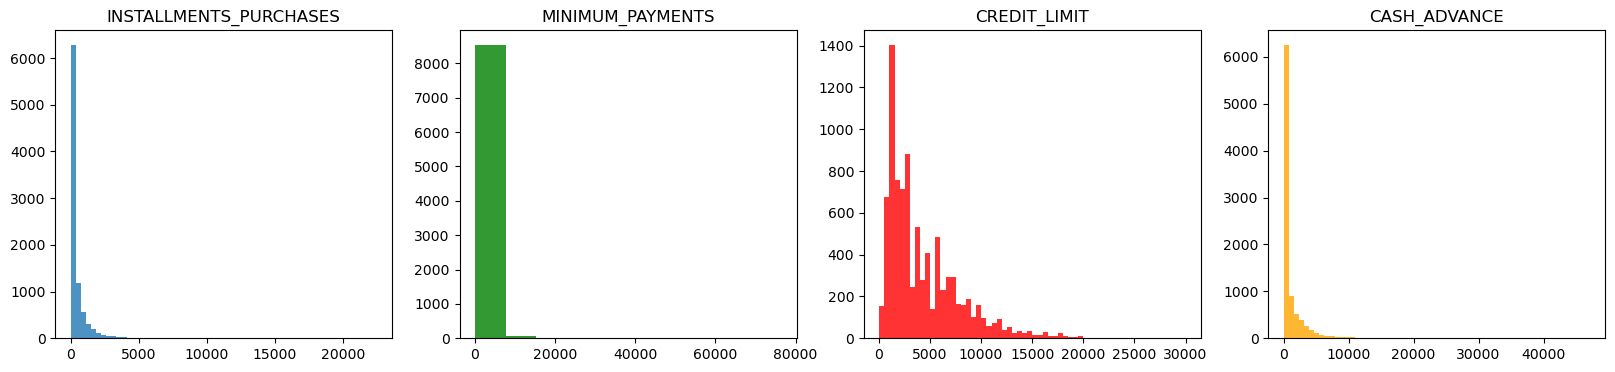

In [18]:
fig, ax = plt.subplots(1,4,figsize =(20,4))
ax0, ax1, ax2, ax3 = ax.flatten()

ax0.hist(data['INSTALLMENTS_PURCHASES'], bins = 60, alpha =0.8 )
ax1.hist(data['MINIMUM_PAYMENTS'], bins = 10, color="green" ,alpha =0.8 )
ax2.hist(data['CREDIT_LIMIT'], bins = 60, color="red",alpha =0.8 )
ax3.hist(data['CASH_ADVANCE'], bins = 60, color="orange",alpha =0.8 )

ax0.set_title("INSTALLMENTS_PURCHASES")
ax1.set_title("MINIMUM_PAYMENTS")
ax2.set_title("CREDIT_LIMIT")
ax3.set_title("CASH_ADVANCE")

plt.show()

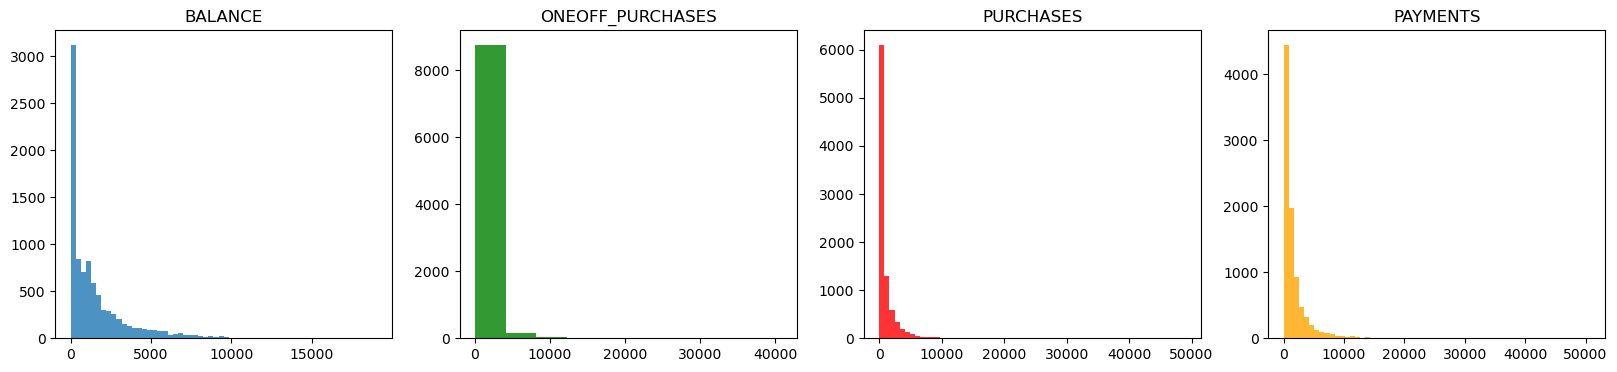

In [20]:
fig, ax = plt.subplots(1,4,figsize =(20,4))
ax0, ax1, ax2, ax3 = ax.flatten()

ax0.hist(data['BALANCE'], bins = 60, alpha =0.8 )
ax1.hist(data['ONEOFF_PURCHASES'], bins = 10, color="green" ,alpha =0.8 )
ax2.hist(data['PURCHASES'], bins = 60, color="red",alpha =0.8 )
ax3.hist(data['PAYMENTS'], bins = 60, color="orange",alpha =0.8 )

ax0.set_title("BALANCE")
ax1.set_title("ONEOFF_PURCHASES")
ax2.set_title("PURCHASES")
ax3.set_title("PAYMENTS")

plt.show()

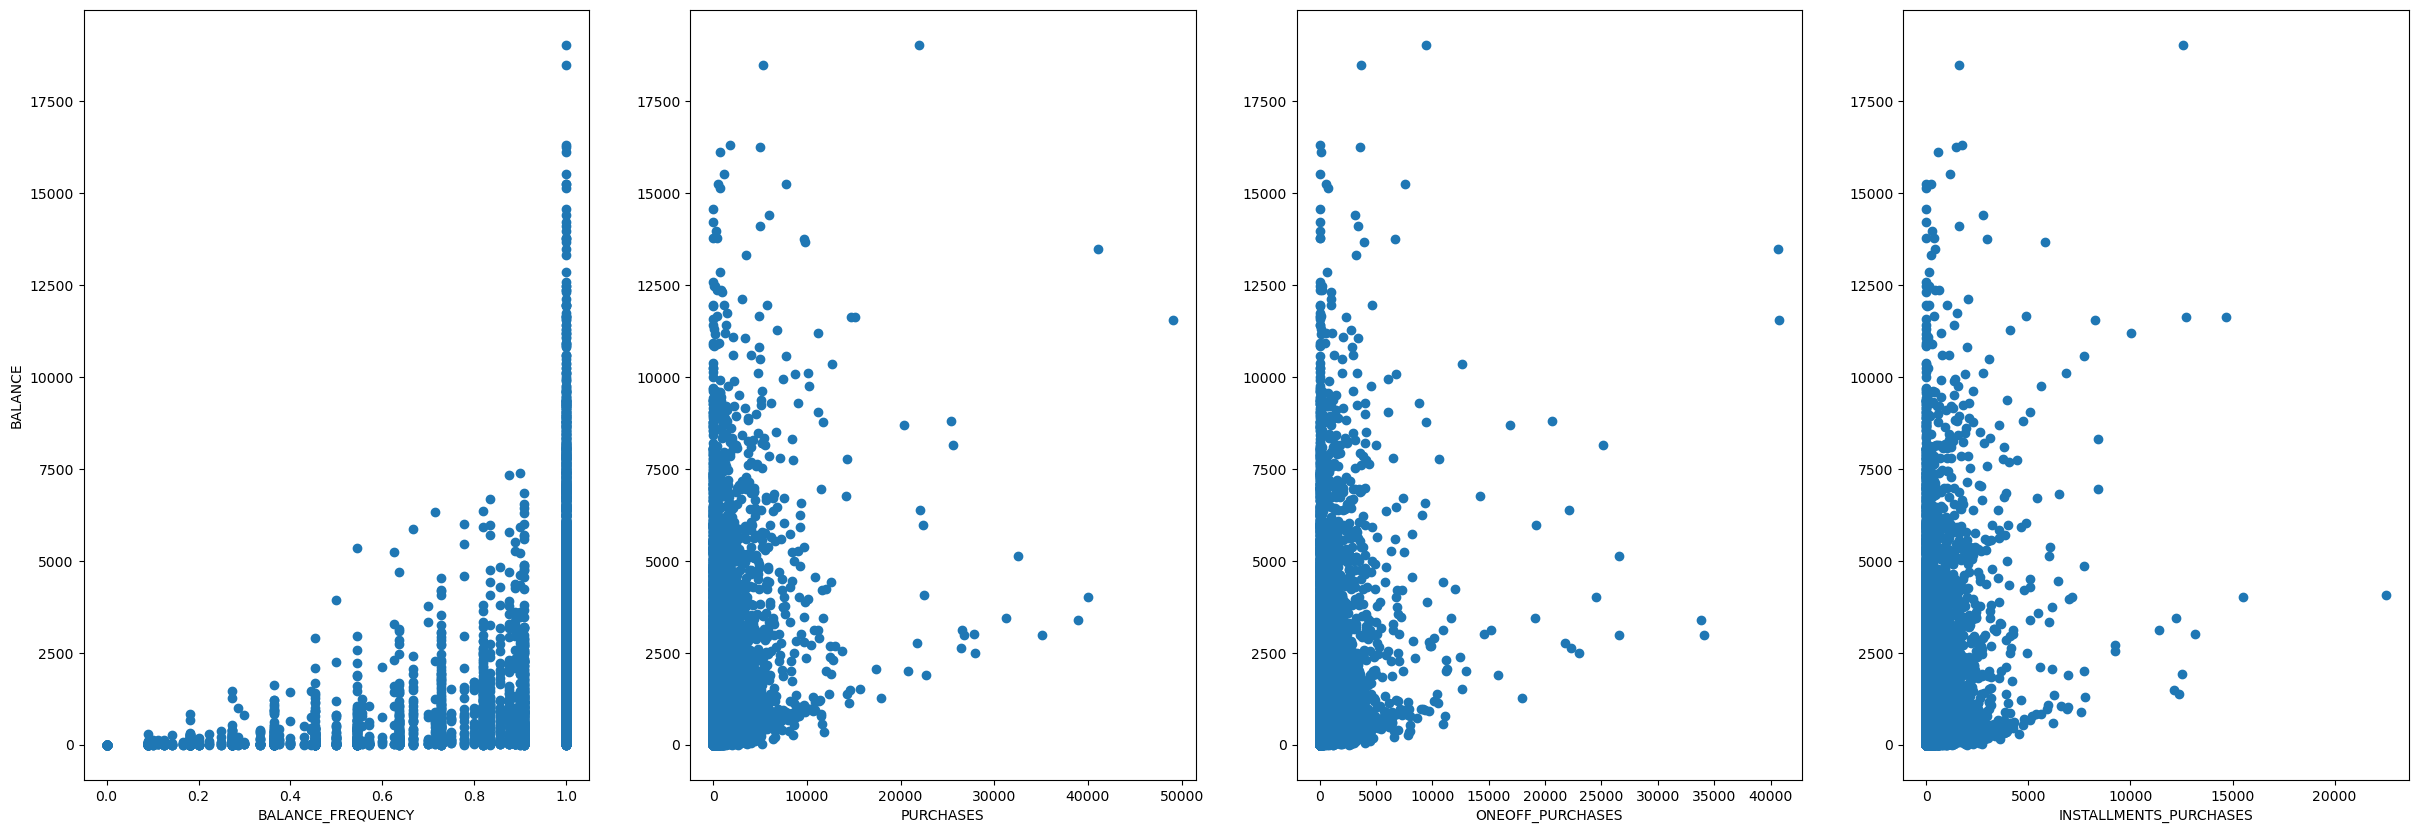

In [30]:
cols   = data.columns
fig , ax = plt.subplots(1,4, figsize = (30,10))
ax0, ax1, ax2, ax3 = ax.flatten() 

for i in range(0,4):
    
    X   = data[cols[i+2]]
    Y   = data[cols[1]]
    ax[i].plot(X, Y, marker = 'o', linestyle = "None")
    ax[i].set_xlabel(cols[i+2])
    ax[0].set_ylabel(cols[1])